# Центральная предельная теорема

In [1]:
import numpy as np
import scipy.stats as sts
import scipy
import matplotlib.pyplot as plt

%matplotlib inline

Возьмем распределение Вейбула с $\lambda=1$, и зададим его параметр

In [2]:
c = 1.5
dist_cont = sts.weibull_min(c=c)

Построим гистограмму выборки размером 1000 и теоретическую плотность вероятности

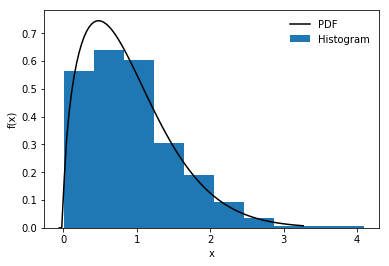

In [3]:
# Рассчитаем значения 1 и 99 процентилей распределения, возьмем интервал немного шире для наглядности
x = np.linspace(dist_cont.ppf(0.01) - 0.1, dist_cont.ppf(0.99) + 0.5, 100)
fig, ax = plt.subplots(1, 1)
# Построим плотность распределения
ax.plot(x, dist_cont.pdf(x), 'k-', label='PDF')
# Построим гистограмму
sample = dist_cont.rvs(1000)
ax.hist(sample, density=True, label='Histogram') # normed is deprecated
ax.legend(loc='best', frameon=False)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

Рассчитаем теоретические значения математического ожидания и распределения Вейбулла. Затем построим наборы из 1000 выборок требуемого размера. Для каждого наобра выборк посчитаем дисперсию, как дисперсию распределения, деленную на размер выборки. После этого построим гистограммы распределения выборочных средних и нрмального распределения с расчитанными параметрами.

Mean theoretical value is 0.90275


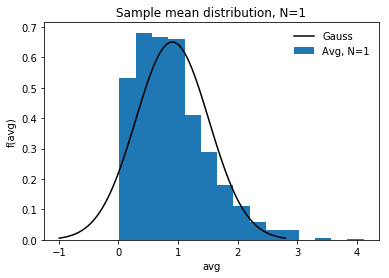

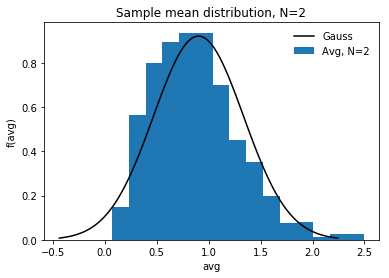

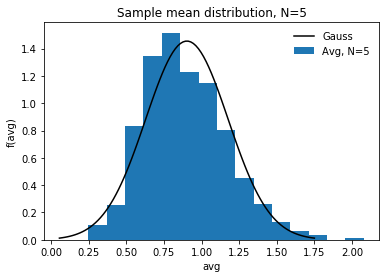

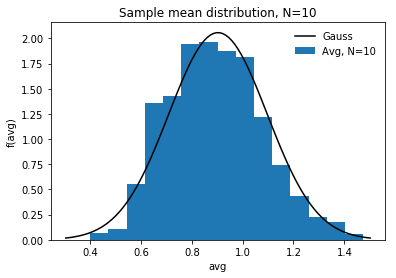

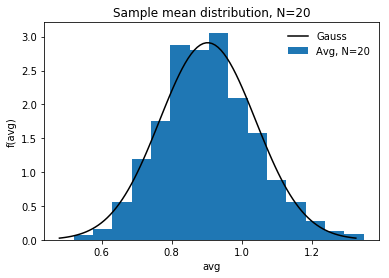

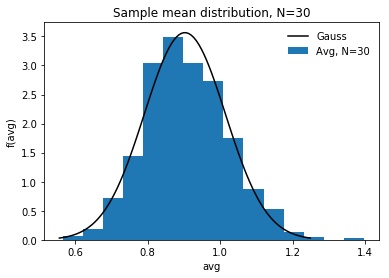

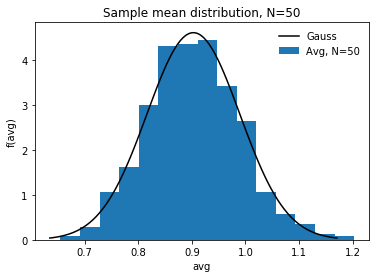

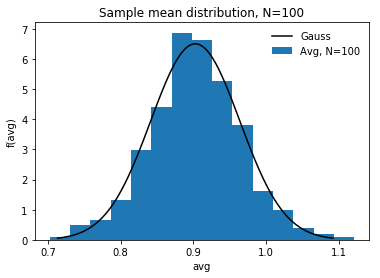

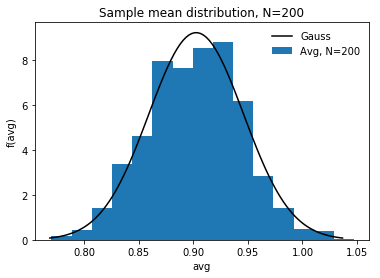

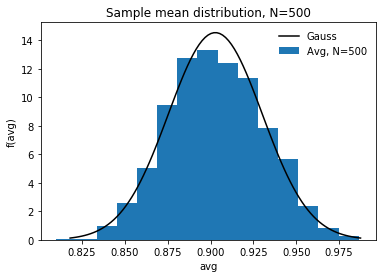

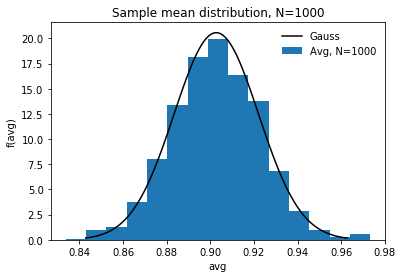

In [4]:
# Теоретические значения матожидания и дисперсии распределения Вейбула
EX = scipy.special.gamma(1 + 1 / c)
DX = scipy.special.gamma(1 + 2 / c) - EX**2
print('Mean theoretical value is {:0.5f}'.format(EX))
# Размер выборок
N = [1, 2, 5, 10, 20, 30, 50, 100, 200, 500, 1000]
I = 1000
for n in N:
    avg = []
    # Соберем набор из выборочных средних
    for i in range(I):
        avg.append(np.mean(dist_cont.rvs(n)))    
    # По ЦПТ матожидание распределения выборочных средних должно совпадать с матожиданием исходного распределения
    mu = EX
    # Дисперсия распределения выборочных средних связана с дисперсией исходного распределения через размер выборки
    s2 = DX / n
    # Зафиксируем параметры нормального распределения
    norm_dist = sts.norm(loc=mu, scale=np.sqrt(s2))
    x = np.linspace(norm_dist.ppf(0.001), norm_dist.ppf(0.999), 100)
    
    # Строим график
    fig, ax = plt.subplots(1, 1)
    # Нормальное распределение
    ax.plot(x, norm_dist.pdf(x), 'k-', label='Gauss')
    # Гистограмма
    ax.hist(avg, density=True, label='Avg, N={}'.format(n), bins=15) # немного увеличим число столбцов, 
                                                                     # так гистограмма получается чуть более "гладкой"
    
    ax.legend(loc='best', frameon=False)
    ax.set_xlabel('avg')
    ax.set_ylabel('f(avg)')
    plt.title('Sample mean distribution, N={}'.format(n))
    plt.show()

Выводы:
1. Чем больше размеры выборки, тем ближе распределение выборочных средних к нормальному. Начиная с N=20 для распределения Вейбулла с выбранными параметрами гистограмма выборочных средних неплохо описывается нормальным распределением
2. Чем больше размер выборки, тем меньше дисперсия (и, соответственно, среднеквадратическое отклонение) распределения выборочных средних.
3. Если взять распределение с более симметричной плотностью вероятности, его распределение выборочных средних будет сходиться к нормальному распределению быстрее, чем у несимметричного. Ниже показаны примеры для распределения Парето и нормального.

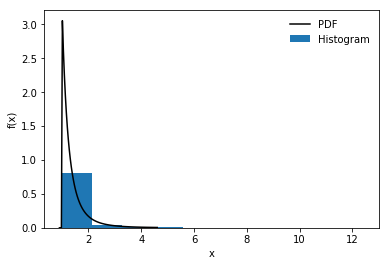

Mean theoretical value is 1.44248


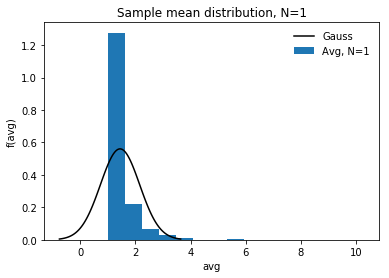

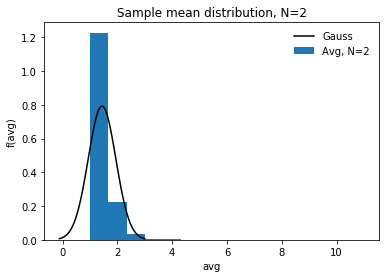

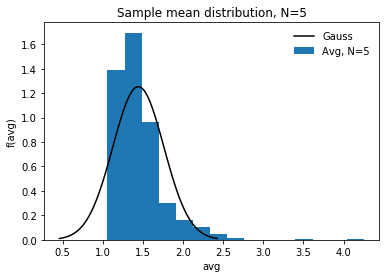

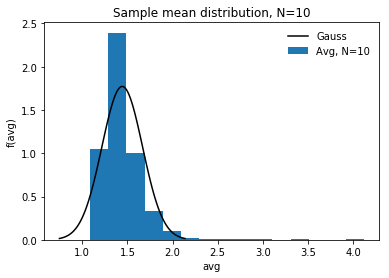

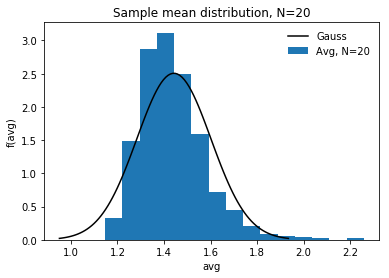

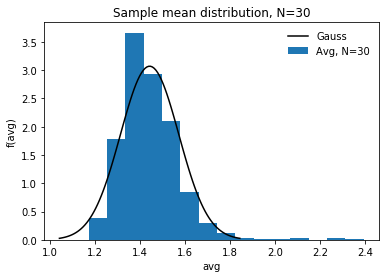

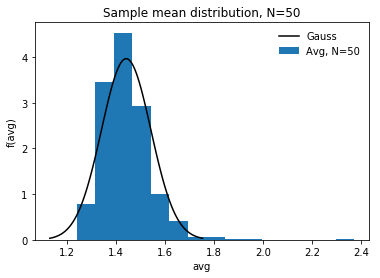

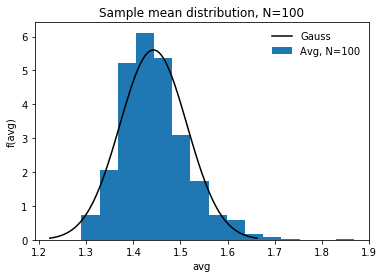

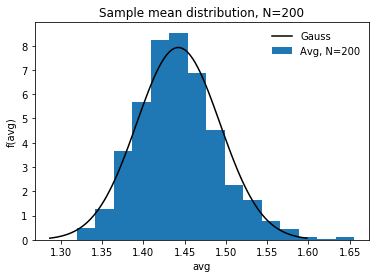

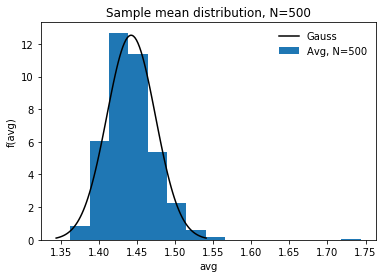

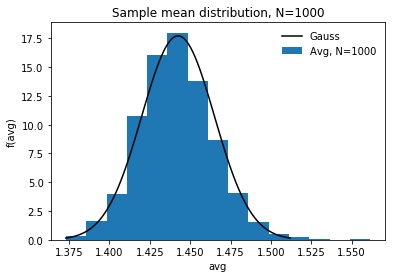

In [5]:
b = 3.26
dist_cont = sts.pareto(b=b)
x = np.linspace(dist_cont.ppf(0.01) - 0.1, dist_cont.ppf(0.99) + 0.5, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, dist_cont.pdf(x), 'k-', label='PDF')
sample = dist_cont.rvs(1000)
ax.hist(sample, density=True, label='Histogram')
ax.legend(loc='best', frameon=False)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()
EX = b / (b - 1)
DX = b / ((b - 1)**2 * (b - 2))
print('Mean theoretical value is {:0.5f}'.format(EX))
N = [1, 2, 5, 10, 20, 30, 50, 100, 200, 500, 1000]
I = 1000
for n in N:
    avg = []
    for i in range(I):
        avg.append(np.mean(dist_cont.rvs(n)))
    mu = EX
    s2 = DX / n
    norm_dist = sts.norm(loc=mu, scale=np.sqrt(s2))
    x = np.linspace(norm_dist.ppf(0.001), norm_dist.ppf(0.999), 100)
    fig, ax = plt.subplots(1, 1)
    ax.plot(x, norm_dist.pdf(x), 'k-', label='Gauss')
    ax.hist(avg, density=True, label='Avg, N={}'.format(n), bins=15)
    ax.legend(loc='best', frameon=False)
    ax.set_xlabel('avg')
    ax.set_ylabel('f(avg)')
    plt.title('Sample mean distribution, N={}'.format(n))
    plt.show()

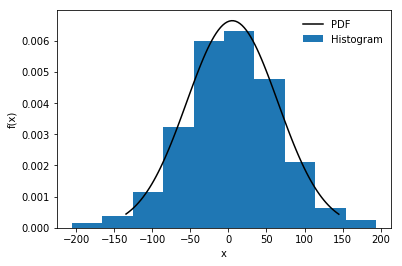

Mean theoretical value is 5.00000


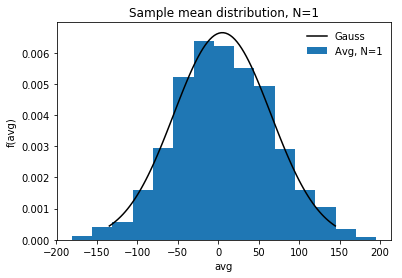

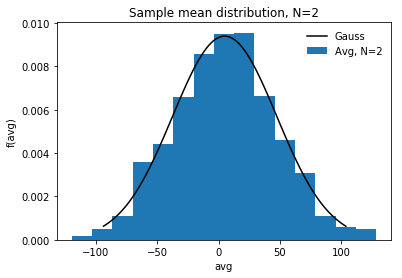

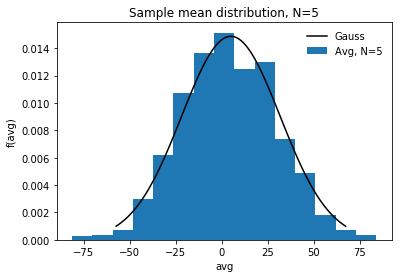

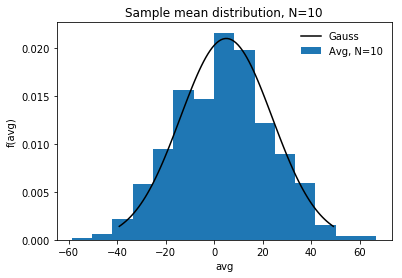

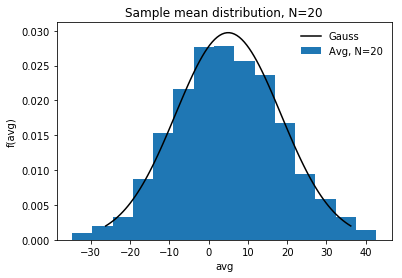

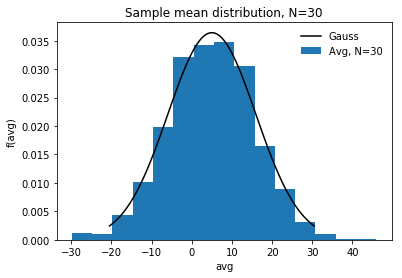

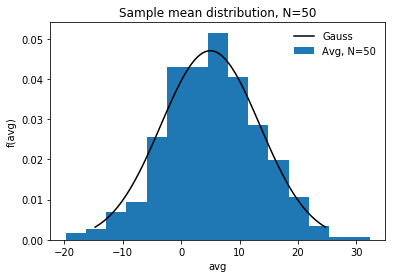

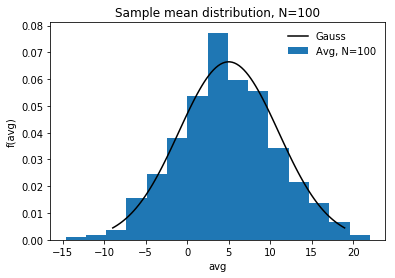

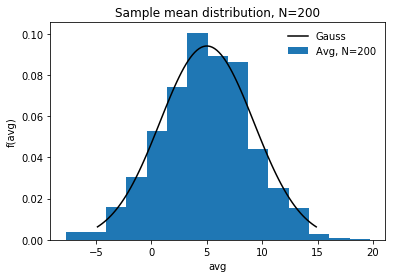

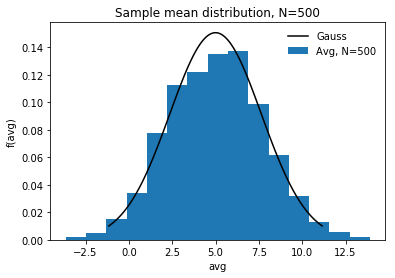

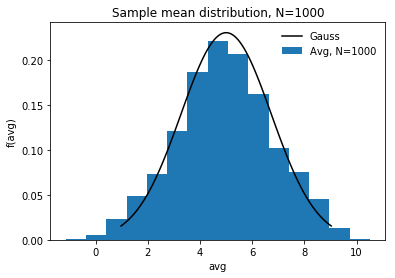

In [6]:
mu = 5
sigma = 60
dist_cont = sts.norm(loc = mu, scale = sigma)
x = np.linspace(dist_cont.ppf(0.01) - 0.1, dist_cont.ppf(0.99) + 0.5, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, dist_cont.pdf(x), 'k-', label='PDF')
sample = dist_cont.rvs(1000)
ax.hist(sample, density=True, label='Histogram')
ax.legend(loc='best', frameon=False)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()
EX = mu
DX = sigma**2
print('Mean theoretical value is {:0.5f}'.format(EX))
N = [1, 2, 5, 10, 20, 30, 50, 100, 200, 500, 1000]
I = 1000
for n in N:
    avg = []
    for i in range(I):
        avg.append(np.mean(dist_cont.rvs(n)))
    mu = EX
    s2 = DX / n
    norm_dist = sts.norm(loc=mu, scale=np.sqrt(s2))
    x = np.linspace(norm_dist.ppf(0.01), norm_dist.ppf(0.99), 100)
    fig, ax = plt.subplots(1, 1)
    ax.plot(x, norm_dist.pdf(x), 'k-', label='Gauss')
    ax.hist(avg, density=True, label='Avg, N={}'.format(n), bins=15)
    ax.legend(loc='best', frameon=False)
    ax.set_xlabel('avg')
    ax.set_ylabel('f(avg)')
    plt.title('Sample mean distribution, N={}'.format(n))
    plt.show()